In [1]:
import pandas as pd
import numpy as np
# opencv-python
import cv2

In [3]:
# 이미지별 바운딩 box의 x, y 좌표값 데이터셋
# cardataset의 train_solution_bounding_boxes (1).csv 파일 읽어 들이기
# 데이터프레임 변수명 : box
# 데이터 확인하기
path = "./yolo3/cardataset/train_solution_bounding_boxes (1).csv"
box = pd.read_csv(path)
box

,image,xmin,ymin,xmax,ymax
0,vid_4_1000.jpg,281.259045,187.035071,327.727931,223.225547
1,vid_4_10000.jpg,15.163531,187.035071,120.329957,236.430180
2,vid_4_10040.jpg,239.192475,176.764801,361.968162,236.430180
3,vid_4_10020.jpg,496.483358,172.363256,630.020260,231.539575
4,vid_4_10060.jpg,16.630970,186.546010,132.558611,238.386422
...,...,...,...,...,...
554,vid_4_9860.jpg,0.000000,198.321729,49.235251,236.223284
555,vid_4_9880.jpg,329.876184,156.482351,536.664239,250.497895
556,vid_4_9900.jpg,0.000000,168.295823,141.797524,239.176652
557,vid_4_9960.jpg,487.428988,172.233646,616.917699,228.839864


In [6]:
# 이미지 읽어 들이기
sample = cv2.imread("./yolo3/cardataset/training_images/vid_4_1000.jpg")
sample

array([[[255, 211, 128],
        [254, 210, 127],
        [254, 210, 127],
        ...,
        [252, 184, 101],
        [251, 183, 100],
        [250, 182,  99]],

       [[255, 211, 128],
        [255, 211, 128],
        [254, 210, 127],
        ...,
        [251, 183, 100],
        [253, 182, 102],
        [251, 183, 100]],

       [[254, 212, 129],
        [254, 212, 129],
        [253, 211, 128],
        ...,
        [254, 183, 103],
        [255, 182, 104],
        [254, 183, 103]],

       ...,

       [[ 78,  50,  26],
        [ 80,  52,  28],
        [ 79,  51,  27],
        ...,
        [ 67,  43,  21],
        [ 67,  43,  21],
        [ 67,  43,  21]],

       [[ 78,  47,  24],
        [ 81,  50,  27],
        [ 79,  51,  27],
        ...,
        [ 67,  43,  21],
        [ 67,  43,  21],
        [ 67,  43,  21]],

       [[ 79,  48,  25],
        [ 82,  51,  28],
        [ 80,  52,  28],
        ...,
        [ 66,  42,  20],
        [ 66,  42,  20],
        [ 66,  42,  20]]

In [7]:
# YOLO에서는 RGB 색상채널의 순서를 BGR 순서로 사용
# COLOR_BGR2RGB : 색상채널의 순서를 BGR로 바꾸기
# cvtColor : 색상 공간을 변경하는 함수
sample = cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)
print(sample)

[[[128 211 255]
  [127 210 254]
  [127 210 254]
  ...
  [101 184 252]
  [100 183 251]
  [ 99 182 250]]

 [[128 211 255]
  [128 211 255]
  [127 210 254]
  ...
  [100 183 251]
  [102 182 253]
  [100 183 251]]

 [[129 212 254]
  [129 212 254]
  [128 211 253]
  ...
  [103 183 254]
  [104 182 255]
  [103 183 254]]

 ...

 [[ 26  50  78]
  [ 28  52  80]
  [ 27  51  79]
  ...
  [ 21  43  67]
  [ 21  43  67]
  [ 21  43  67]]

 [[ 24  47  78]
  [ 27  50  81]
  [ 27  51  79]
  ...
  [ 21  43  67]
  [ 21  43  67]
  [ 21  43  67]]

 [[ 25  48  79]
  [ 28  51  82]
  [ 28  52  80]
  ...
  [ 20  42  66]
  [ 20  42  66]
  [ 20  42  66]]]


In [9]:
point = box.iloc[0]
point

image    vid_4_1000.jpg
xmin         281.259045
ymin         187.035071
xmax         327.727931
ymax         223.225547
Name: 0, dtype: object

In [10]:
# 객체 탐지를 통해 사각형 박스를 그리기 위한 좌표값 확인
# 박스 시작 위치
pt1 = (int(point["xmin"]), int(point["ymax"]))
# 박스 끝 위치
pt2 = (int(point["xmax"]), int(point["ymin"]))
print(pt1, pt2)

(281, 223) (327, 187)


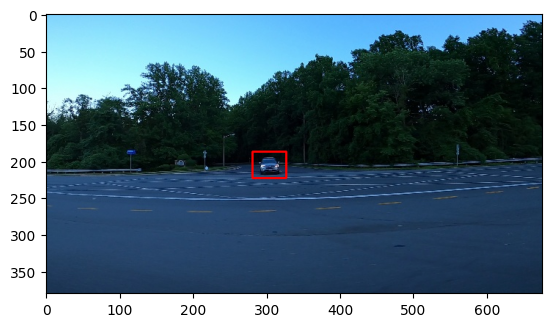

In [13]:
import matplotlib.pyplot as plt

# x, y 좌표에 대한 사각형 박스 그리기
cv2.rectangle(sample, pt1, pt2, color=(255,0,0), thickness=2)

# 이미지 그리기
plt.imshow(sample)

(15, 236) (120, 187)


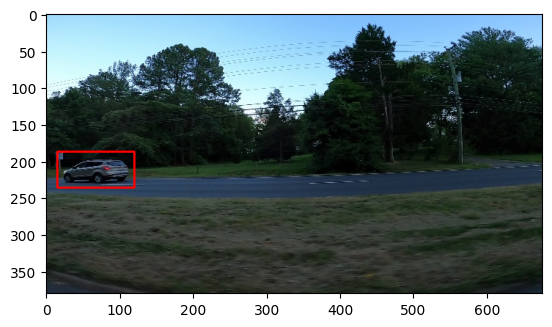

In [24]:
# vid_4_10000.jpg 이미지에 대한 x, y좌표값 확인해서 bounding 박스 그려보기

a = cv2.imread("./yolo3/cardataset/training_images/vid_4_10000.jpg")
a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)

point = box.iloc[1]

# 객체 탐지를 통해 사각형 박스를 그리기 위한 좌표값 확인
# 박스 시작 위치
pt1 = (int(point["xmin"]), int(point["ymax"]))
# 박스 끝 위치
pt2 = (int(point["xmax"]), int(point["ymin"]))
print(pt1, pt2)
# x, y 좌표에 대한 사각형 박스 그리기
cv2.rectangle(a, pt1, pt2, color=(255,0,0), thickness=2)

# 이미지 그리기
plt.imshow(a)

In [27]:
# 훈련모델 및 환경데이터 읽어들이기 
net = cv2.dnn.readNet("./yolo3/yolov3.weights", "./yolo3/yolov3.cfg")
print("net ==> ", net)

net ==>  < cv2.dnn.Net 0000020CB25B1690>


In [28]:
# 레이블(종속변수) 이름 데이터 읽어들이기
classes = []
with open("./yolo3/coco.names", "r") as f:
    # strip() : 문자열의 제일 앞쪽과 제일 뒷쪽 공백이 있으면 제거
    # 문자열 중간에 있는 공백은 유지
    classes = [line.strip() for line in f.readlines()]
print("classes ==> ", classes)

classes ==>  ['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [30]:
# 훈련모델 계층의 이름 확인
layer_names = net.getLayerNames()
print("layer_names ==> ", layer_names)

layer_names ==>  ('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37',

In [32]:
# getUnconnectedOutLayers
# 물체 감지 알고리즘(레이어) 조회하기
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
print("output_layers ==> ", output_layers)

output_layers ==>  ['yolo_82', 'yolo_94', 'yolo_106']


In [34]:
img = cv2.imread("./yolo3/cardataset/training_images/vid_4_10000.jpg")
# BGR변환
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 이미지 데이터 읽어들이기
height, width, channels = img.shape
print("height, width, channels ==> ", height, width, channels)

height, width, channels ==>  380 676 3


In [38]:
# 이미지 데이터를 Blob형태로 변형해 처리
# 네트워크(레이어, 계층)에서는 이미지를 그대로 사용할 수 없음
# 먼저 이미지를 Blob 데이터 형태로 변환해야함 - > 정규화의 개념
# Blob은 이미지에서 특징을 잡아내고 크기를 조정하는데 사용되는 데이터
# YOLO가 아마자 사용시 전체 허용하는 3가지 너비와 높이 사이즈
# 320 x 320 : 작고 정확도는 떨어지지만 속도는 빠름
# 609 x 6089 : 정확도는 더 높지만 속도 느림
# 416 x 416 : 위 두개의 중간

# blobFromImage : 물체감지 함수
# 이미지를 blob로 변환
# swapPB : RGB에서 R값과 B값을 바꿀것인지 결정(기본값 False)
# 첫번째와 마지막 색상 채널을 바꿀지 결정
# crop : 이미지 전체 크기를 조정한 후 이미지를 자를지 결정
# 기본값은 False
blob = cv2.dnn.blobFromImage(img, 1/256, (416,416),
                            (0,0,0),
                            swapRB = True,
                            crop = False)
# blob 데이터를 모델(net)의 입력데이터로 설정
net.setInput(blob)
print("blob => ", blob)

blob =>  [[[[0.9921875  0.98828125 0.98828125 ... 0.9921875  0.984375
    0.98046875]
   [0.98828125 0.98828125 0.98828125 ... 0.98828125 0.984375
    0.984375  ]
   [0.9921875  0.98828125 0.98828125 ... 0.98828125 0.98828125
    0.98828125]
   ...
   [0.2265625  0.2265625  0.23046875 ... 0.20703125 0.203125
    0.19921875]
   [0.23046875 0.23046875 0.234375   ... 0.2109375  0.203125
    0.19921875]
   [0.23828125 0.234375   0.234375   ... 0.20703125 0.203125
    0.19921875]]

  [[0.84765625 0.84375    0.84375    ... 0.77734375 0.77734375
    0.7734375 ]
   [0.84765625 0.84375    0.84375    ... 0.77734375 0.77734375
    0.77734375]
   [0.84765625 0.84375    0.8515625  ... 0.77734375 0.77734375
    0.77734375]
   ...
   [0.16796875 0.16796875 0.171875   ... 0.16015625 0.16015625
    0.15625   ]
   [0.171875   0.171875   0.171875   ... 0.16015625 0.16015625
    0.15625   ]
   [0.1796875  0.17578125 0.171875   ... 0.15625    0.16015625
    0.15625   ]]

  [[0.62890625 0.6171875  0.6171875

In [39]:
# 출력할 결과값을 계산할 레이어 정의
# 출력으로 탐지된 객체에 대한 모든 정보와 위치를 제공
# forward : 해당 layer의 입력을 받아서 출력할 결과를 계산
outs = net.forward(output_layers)
print("outs => ",outs)

outs =>  (array([[0.04679778, 0.03433373, 0.28790593, ..., 0.        , 0.        ,
        0.        ],
       [0.05456533, 0.0370989 , 0.22921911, ..., 0.        , 0.        ,
        0.        ],
       [0.0551306 , 0.02743611, 0.96065   , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.954012  , 0.9486527 , 0.3288776 , ..., 0.        , 0.        ,
        0.        ],
       [0.96470416, 0.9620132 , 0.27363154, ..., 0.        , 0.        ,
        0.        ],
       [0.9706778 , 0.9628068 , 0.79760844, ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.02577206, 0.02195057, 0.05853284, ..., 0.        , 0.        ,
        0.        ],
       [0.0191344 , 0.02317063, 0.2564375 , ..., 0.        , 0.        ,
        0.        ],
       [0.0280959 , 0.01867269, 0.08994662, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9745299 , 0.9763843 , 0.05167977, ..., 0.        , 0.        ,
        0.        ],
       [0

In [42]:
# 정보를 표시할 변수 정의
class_ids = []
confidences = []
boxes = []

for out in outs:
    # 객체 탐지 영역
    # 탐지된 객체 이름과 정확도 조회
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        
        # print("scores => ",scores)
        
        # 정확도가 0.5보다 큰 경우 객체 탐지로 보고 처리
        if confidence > 0.5:
            # Object Detected
            center_x = int(detection[0]*width)
            center_y = int(detection[1]*height)
            # 이미지 크기
            w = int(detection[2]*width)
            h = int(detection[3]*height)
            
            # 박스 x, y 좌표 
            x = int(center_x - w/2)
            y = int(center_y - w/2)
            
            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
            
# print(class_ids)
print(confidences)
# confidences의 값이 1에 가까우면 객체 인지 정확도 높음
# 0에 가까우면 정확도가 떨어지지만 검출되는 객체수는 많아짐

[0.9849126935005188]


In [44]:
# 검출되는 수가 많아지는 경우 바운딩 박스가 중복될 수 있음
# 검출 과정에서 바운딩박스가 많아지는 경우 중복을 피하기 위해 NMSBoxes 계층 처리
# 중복 바운드 제거하는 기능
indexes = cv2.dnn.NMSBoxes(boxes, confidences,0.5,0.4)
print(indexes)

[0]


(1,) [0]


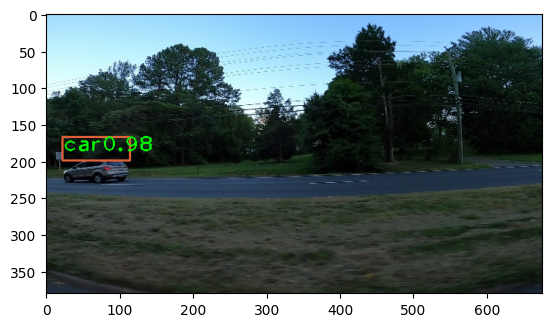

In [62]:
"""
 <표시할 값>
 - box : 사각형 좌표(표시는 안됨, 내부적으로 그리기 위해 사용)
 - label : 감지된 물체 이름
 - Confidence : 0~1 사이의 정확도(신뢰도)
"""

### 폰트 설정
font = cv2.FONT_HERSHEY_PLAIN

### 객체가 여러개인 경우 색상 지정을 위해 랜덤값 사용
colors = np.random.uniform(0, 255, size=(len(boxes), 3))

print(indexes.shape, indexes.flatten())

### 이미지에 표시하기
# - indexes.flatten() : indexes 내에 있는 데이터 값들을 리스트 처리 
for i in indexes.flatten() :
    ### 박스의 x, y 좌표값
    x, y, w, h = boxes[i]
    # print(x, y, w, h)
    
    ### 객체 이름 : 문자열 타입으로 변환
    label = str(classes[class_ids[i]])
    # print(label)
    
    ### 정확도(신뢰도)
    confidence = str(round(confidences[i], 2))
    # print(confidence)
    
    ### 사용하는 색상
    color = colors[i]
    # print(color)
    
    ### 사각형 그리기
    cv2.rectangle(img, (x,y), ((x+w), (y+h)), color, 2)
    
    ### 사물 이름과 정확도 넣기
    cv2.putText(img, label + "" + confidence,
                (x, y+20), font, 2, (0, 255, 0), 2)
### 이미지 그리기
plt.imshow(img)

In [63]:
def predict_yolo(img_path):
    # 이미지 가져오기
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    height, width, channels = img.shape

    blob = cv2.dnn.blobFromImage(img, 1/256, (416, 416), (0, 0, 0), 
                               swapRB=True, crop=False)
    net.setInput(blob) 
    outs = net.forward(output_layers)

    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
        
            if confidence > 0.5:
                #****** Object detected *********
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                #****** 좌표 *******
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    font = cv2.FONT_HERSHEY_PLAIN
    colors = np.random.uniform(0, 255, size=(len(boxes), 3))

    if len(indexes) > 0:
        for i in indexes.flatten():
            x, y, w, h = boxes[i]
            print(x, y, w, h)
            label = str(classes[class_ids[i]])
            confidence = str(round(confidences[i], 2))
            color = colors[i]
            cv2.rectangle(img, (x, y), ((x+w), (y+h)), color, 2)
            cv2.putText(img, label + " " + confidence, (x, y+20), 
                    font, 2, (0, 255, 0), 2)

        plt.imshow(img)
  
    else:
        print('탐지된 물체가 없습니다.')

In [96]:
# 여러개의 이미지를 랜덤하게 추출해서 테스트
import glob
import random

# glob() : 제시한 조건(*.jpg)에 맞는 모든 파일명을 리스트로 변환
paths = glob.glob("./yolo3/cardataset/testing_images/*.jpg")

In [97]:
# 랜덤하게 이미지 파일을 선택하기
img_path = random.choice(paths)


# 선택한 경로 안에 원화표시가 있다
# 원화표시는 이미지 불러들일 때 오류 발생
# 원화표시를 슬래시로 바꿔야한다
# 프로그램에서 \표시는 이스케이프 특수기능
# \표시 뒤에 있는 것은 문자로 인식시켜라의 의미
img_path = img_path.replace("\\","/")
print(img_path)

./yolo3/cardataset/testing_images/vid_5_26860.jpg


0 202 21 22


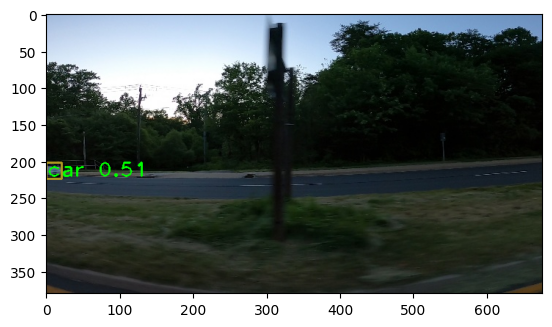

In [98]:
# 함수 호출
predict_yolo(img_path)

3 73 126 35
125 76 25 68
156 76 100 80
0 60 8 15
56 61 40 18


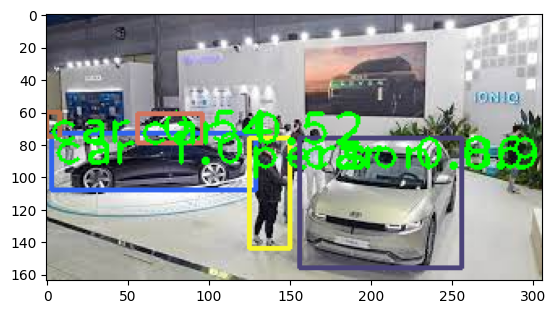

In [102]:
# 함수 호출
predict_yolo("./images/cardisplay.jpg")